# Customer Churn EDA

Maven Music is a streaming service that’s been losing more customers than usual the past few months, and would like to utilize data analytics to decipher patterns and factors influencing customer attrition, predict and address potential customer churn.

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**. This will allow us to:
* Identify the **top predictors of cancellation** and figure out how to address them
* Flag **customers who are more likely to cancel** and take proactive steps to keep them subscribed

## 2. Gather Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the customer data
customers = pd.read_csv('../Data/maven_music_customers.csv')
# Print first 5 lines of customers data
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [3]:
# Get customers data set information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


We have 30 customers, 13 of which seem to have cancelled their subscription \
Missing: we have a few missing subscription plan values\
Data Types: Member Since and Cancellation Date -> datetime, Subscription Rate -> numeric, Discount? nan -> No (consider turning Discount into 0-1?)

In [ ]:
# Read in the listening history data
listening_history = pd.read_excel('../Data/maven_music_listening_history.xlsx')
# Print first 5 lines of listening_history data
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [5]:
# Get listening_history data set information
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


We have 505 rows in this data set. \
No missing values. \
Data types look good.

In [6]:
# Read in the audio data
audio = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=1)
# Print first 5 lines of audio data
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [7]:
# Get audio data set information
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


We have 17 audios in this data set. \
No missing data. \
Data types look good.

In [ ]:
# Read in the session data
session = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=2)
# Print first 5 lines of session data
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [9]:
# Get session data set information
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


We have 90 resords in the session data set. \
No missing values. \
Data types look good.

## 3. Clean Data

### a. Convert Data Types

In [10]:
customers.head(1)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN


In [11]:
# Change 'Member Since' and 'Cancellation Date' columns to datetime
customers['Member Since'] = pd.to_datetime(customers['Member Since'])
customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])

In [12]:
# Change 'Subscription Rate' column to float
customers['Subscription Rate'] = customers['Subscription Rate'].str.replace('$','').astype('float')

C:\Users\Laila\AppData\Local\Temp\ipykernel_4660\2910096877.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customers['Subscription Rate'] = customers['Subscription Rate'].str.replace('$','').astype('float')


In [18]:
# Change 'Discount?' column to numeric
# Yes -> 1, otherwise 0
customers['Discount?'] = np.where(customers['Discount?'] == 'Yes', 1, 0)

In [19]:
# Display customers fields data types after modification
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                     int32
Cancellation Date    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [14]:
# Look for NaN values in the data
customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [15]:
# Display rows with NaN values in 'Subscription Plan' column
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [16]:
# Display unique value combinations for the columns ['Subscription Plan', 'Subscription Rate']
customers[['Subscription Plan', 'Subscription Rate']].drop_duplicates()

,Subscription Plan,Subscription Rate
0,Basic (Ads),2.99
1,NaN,2.99
6,Premium (No Ads),9.99
15,Premium (No Ads),99.99
21,Premium (No Ads),7.99


3 different price rates for the premium plan. (-> inconsistent data)

In [17]:
# Fill NaNs in 'Subscription Plan' column with 'Basic (Ads)'
customers['Subscription Plan'].fillna('Basic (Ads)', inplace=True)

In [20]:
# Look again for NaN values in the data
# Only missing is 'Cancellation Date' indicating active subscribers, so let's leave it at that
customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     0
Subscription Rate     0
Discount?             0
Cancellation Date    17
dtype: int64

#### ii. Inconsistent Text & Typos

In [27]:
customers.head(1)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT


In [21]:
# Display descriptive statistics for customers
customers.describe(include=['int', 'float', 'datetime'])

C:\Users\Laila\AppData\Local\Temp\ipykernel_4660\1326032211.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customers.describe(include=['int', 'float', 'datetime'])
C:\Users\Laila\AppData\Local\Temp\ipykernel_4660\1326032211.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customers.describe(include=['int', 'float', 'datetime'])


,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
unique,NaN,18,NaN,NaN,3
top,NaN,2023-03-28 00:00:00,NaN,NaN,2023-06-01 00:00:00
freq,NaN,4,NaN,NaN,6
first,NaN,2023-03-13 00:00:00,NaN,NaN,2023-06-01 00:00:00
last,NaN,2023-05-16 00:00:00,NaN,NaN,2023-06-03 00:00:00
mean,6276.333333,NaN,8.556667,0.233333,NaN
std,814.255587,NaN,17.517840,0.430183,NaN
min,5001.000000,NaN,2.990000,0.000000,NaN
25%,5759.500000,NaN,2.990000,0.000000,NaN


All looks fine here except for the exceptionally high 99.99 subsription rate which we noted above.

In [23]:
# Display counts of unique values in 'Subscription Plan' column
customers['Subscription Plan'].value_counts()

Basic (Ads)         17
Premium (No Ads)    13
Name: Subscription Plan, dtype: int64

In [24]:
customers[customers['Subscription Rate'] == 99.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


We have a premium customer here, so the rate looks like a typo and should be corrected to 9.99

In [25]:
customers.loc[15, 'Subscription Rate'] = 9.99

In [28]:
listening_history.head(1)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song


In [26]:
# Display descriptive statistics for listening_history
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [ ]:
# Display counts of unique values in 'Audio Type' column
listening_history['Audio Type'].value_counts()

Song       463
Podcast     42
Name: Audio Type, dtype: int64

In [29]:
# Display first row of audio
audio.head(1)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1


In [30]:
# Display descriptive statistics for audio
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [31]:
# Display counts of unique values in 'Genre' column
audio['Genre'].value_counts()

Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

'Pop' and 'Pop Music' are duplicates for the same genre. Let's change 'Pop Music' to 'Pop'.

In [32]:
audio['Genre'] = np.where(audio['Genre']=='Pop Music', 'Pop', audio['Genre'])

In [33]:
# Display first row of session
session.head(1)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00


In [34]:
# Display descriptive statistics for session
session.describe(include='all')

C:\Users\Laila\AppData\Local\Temp\ipykernel_4660\3793168097.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  session.describe(include='all')


,Session ID,Session Log In Time
count,90.000000,90
unique,NaN,90
top,NaN,2023-03-13 18:29:00
freq,NaN,1
first,NaN,2023-03-13 14:14:00
last,NaN,2023-05-31 06:03:00
mean,105619.788889,NaN
std,3616.208569,NaN
min,100520.000000,NaN
25%,102149.000000,NaN


#### iii. Duplicate Rows

In [35]:
# Look for duplicate rows
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [36]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [37]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [38]:
session[session.duplicated()]

,Session ID,Session Log In Time


It looks like we don't have duplicate rows in any of our data sets.

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [39]:
# Create a 'Cancelled' column
# Null 'Cancellation Date' -> 0, otherwise 1
customers['Cancelled'] = np.where(customers['Cancellation Date'].isna(), 0, 1)

In [40]:
# Remove the 'Email: ' portion from the 'Email' column
customers['Email'] = customers['Email'].str.strip('Email: ')

In [41]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.co,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,elodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.co,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.co,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [42]:
customers.head(1)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.co,2023-03-13,Basic (Ads),2.99,0,NaT,0


In [43]:
# How long were customers members before they cancelled?
(customers['Cancellation Date']-customers['Member Since']).mean().days

46

On averge, customers stay for 46 days before they cancel their subscription.

In [49]:
# Cancellation rate for those who had a discount vs those who did not have a discount
customers.groupby('Discount?')['Cancelled'].mean().round(2).to_frame()

,Cancelled
Discount?,
0,0.30
1,0.86


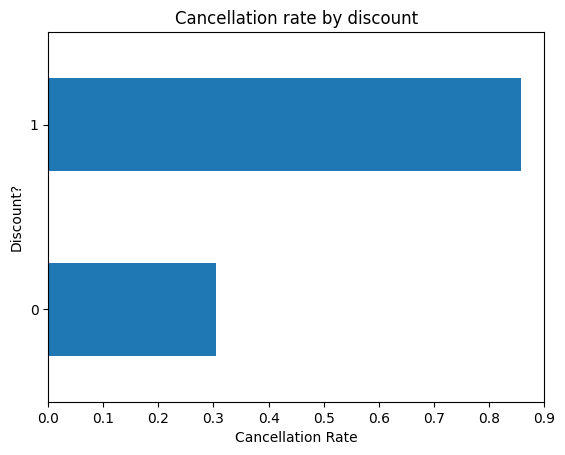

In [50]:
# Visualize the cancellation rate for those with a discount vs those without a discount
(customers.groupby('Discount?')['Cancelled']
          .mean()
          .plot.barh(title = 'Cancellation rate by discount',
                    xlabel = 'Cancellation Rate'));

Members who had a discount had a .86 cancellation rate, much higher than the .3 rate of those who did not have a discount.
This makes sense: members who subscribed through an offer are likely to cancel their plan once the offer ends and they need to renew with the full price.

Better understand the customers' listening histories:
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [51]:
listening_history.head(1)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song


In [52]:
audio.head(1)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1


In [53]:
# Split the ID in the audio data so the column can be joined with other tables
audio[['Audio Type', 'Audio ID']] = audio['ID'].str.split('-', expand=True)

In [54]:
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
Audio Type    object
Audio ID      object
dtype: object

In [55]:
# Convert the 'Audio Type' to int so we can merge it to listening_history later
audio['Audio ID'] = audio['Audio ID'].astype('int')

In [ ]:
# Merge customers data with listening_history and audio
df = (listening_history.merge(audio[['Genre', 'Popularity', 'Audio ID', 'Audio Type']], 
                              how = 'left', 
                              on = ['Audio ID', 'Audio Type']))
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Genre,Popularity
0,5001,100520,1,101,Song,Pop,1.0
1,5001,100520,2,102,Song,Pop,2.0
2,5001,100520,3,103,Song,Pop,5.0
3,5001,100520,4,104,Song,Pop,10.0
4,5001,100520,5,105,Song,Pop,52.0


In [ ]:
# Number of unique listening sessions that each customer had in the past 3 months
cust_session = (df.groupby('Customer ID')['Session ID']
                 .nunique()
                 .reset_index()
                 .rename(columns = {'Session ID':'Session Count'}))
cust_session.head()

,Customer ID,Session Count
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [ ]:
# Merge cust_session to customers to retrieve 'Cancelled' column 
cust_session = cust_session.merge(customers[['Customer ID', 'Cancelled']])
cust_session.head()

,Customer ID,Session Count,Cancelled
0,5001,8,0
1,5002,4,0
2,5004,1,1
3,5267,7,0
4,5338,4,0


In [59]:
# Group cust_ession by 'Cancelled' column
# Get statistics for 'Session Count' column
cust_session.groupby('Cancelled')['Session Count'].describe() 

,count,mean,std,min,25%,50%,75%,max
Cancelled,,,,,,,,
0,17.0,3.470588,1.874755,1.0,2.0,3.0,4.0,8.0
1,13.0,2.384615,1.043908,1.0,2.0,2.0,3.0,4.0


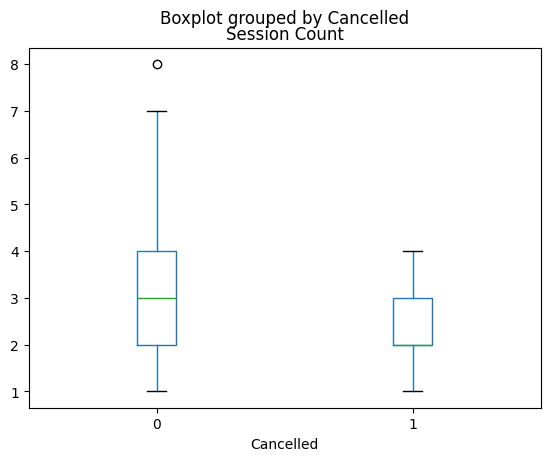

In [90]:
cust_session.boxplot(column='Session Count', by='Cancelled', grid=False);

* On average those who cancelled their subscription had less listening sessions (2.4) than those who did not cancel (3.5). 
* Subscribers listened to up to **double** the sessions that those who cancelled had.
* Churned customers may have stopped using our app and cancelled their subscription because they were unable to find music that suited their tastes. It could also be that they were listening to a podcast and, after the show ended, they cancelled their plan.

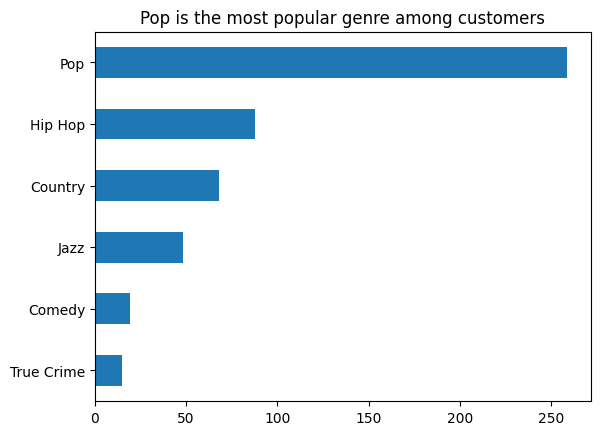

In [88]:
# Most popular genres
df['Genre'].value_counts(ascending=True).plot.barh()
plt.title('Pop is the most popular genre among customers');

In [63]:
# The ratio of songs/ podcasts that each customer listened to in the past 3 months
cust_audio_type = (pd.crosstab(index=df['Customer ID'], columns=df['Audio Type'], normalize='index')
                    .reset_index()
                    .rename_axis(None, axis=1))
cust_audio_type.head()

,Customer ID,Podcast,Song
0,5001,0.0,1.0
1,5002,0.0,1.0
2,5004,0.0,1.0
3,5267,0.0,1.0
4,5338,0.0,1.0


In [64]:
# Merge cust_audio_type to customers to retrieve 'Cancelled' column 
cust_audio_type = cust_audio_type.merge(customers[['Customer ID', 'Cancelled']])
cust_audio_type.head()

,Customer ID,Podcast,Song,Cancelled
0,5001,0.0,1.0,0
1,5002,0.0,1.0,0
2,5004,0.0,1.0,1
3,5267,0.0,1.0,0
4,5338,0.0,1.0,0


In [68]:
# Group cust_audio_type by 'Cancelled' column
# Get statistics for 'Song' and 'Podcast' columns
cust_audio_type.groupby('Cancelled')[['Song', 'Podcast']].describe()

Song                                                   Podcast  \
          count      mean       std  min       25%  50%  75%  max   count   
Cancelled                                                                   
0          17.0  0.777778  0.415740  0.0  1.000000  1.0  1.0  1.0    17.0   
1          13.0  0.783317  0.327044  0.0  0.727273  1.0  1.0  1.0    13.0   

                                                             
               mean       std  min  25%  50%       75%  max  
Cancelled                                                    
0          0.222222  0.415740  0.0  0.0  0.0  0.000000  1.0  
1          0.216683  0.327044  0.0  0.0  0.0  0.272727  1.0

* On average, both subscribers and churned customers listen to songs ~78% of the time

## 5. Prep for Modeling

We need to create a customer-level data set with numeric, non-null features. Included features are: 
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* Number of listening sessions
* Ratio of listening history consisting of Pop
* Ratio of listening history consisting of Podcasts

In [91]:
# Create a dataframe ready for modeling
model_df = customers[['Customer ID', 'Discount?', 'Cancelled']].copy()

In [92]:
# Calculate the number of listening sessions for each customer
cust_session = (listening_history.groupby('Customer ID')['Session ID']
                                 .nunique()
                                 .reset_index()
                                 .rename(columns={'Session ID':'Session Count'}))
cust_session.head()

,Customer ID,Session Count
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [93]:
# Add it to the modeling dataframe
model_df = model_df.merge(cust_session, how='left')
model_df.head()

,Customer ID,Discount?,Cancelled,Session Count
0,5001,0,0,8
1,5002,0,0,4
2,5004,0,1,1
3,5267,0,0,7
4,5338,0,0,4


In [94]:
# Ratio of listening history of each genre
cust_genre = (pd.crosstab(index=df['Customer ID'], columns=df['Genre'], normalize='index')
                .reset_index()
                .rename_axis(None, axis=1))
cust_genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0.0,0.0,0.433333,0.0,0.566667,0.0
1,5002,0.0,1.0,0.000000,0.0,0.000000,0.0
2,5004,0.0,0.0,0.000000,0.0,1.000000,0.0
3,5267,0.0,0.0,0.488889,0.0,0.511111,0.0
4,5338,0.0,1.0,0.000000,0.0,0.000000,0.0


In [95]:
# Add it to the modeling dataframe
model_df = model_df.merge(cust_genre[['Customer ID', 'Pop']], how = 'left')
model_df.head()

,Customer ID,Discount?,Cancelled,Session Count,Pop
0,5001,0,0,8,0.566667
1,5002,0,0,4,0.000000
2,5004,0,1,1,1.000000
3,5267,0,0,7,0.511111
4,5338,0,0,4,0.000000


In [96]:
# Ratio of listening history consisting of Podcasts
model_df = model_df.merge(cust_audio_type[['Customer ID', 'Podcast']], how = 'left')
model_df.head()

,Customer ID,Discount?,Cancelled,Session Count,Pop,Podcast
0,5001,0,0,8,0.566667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,0,1,1,1.000000,0.0
3,5267,0,0,7,0.511111,0.0
4,5338,0,0,4,0.000000,0.0


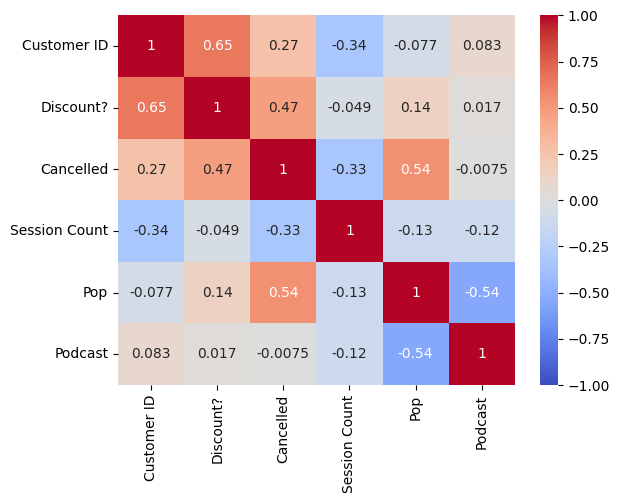

In [ ]:
# Visualize the correlations in the modeling DataFrame using a heat map
sns.heatmap(model_df.corr(), vmin=-1, cmap='coolwarm', annot=True);

**Observations:**
* Discount is correlated with cancellations. (Moderate Relationship)
* The more listening sessions, the fewer cancellations. (Weak relationship)
* The more pop music ratio, the more cancellations. (Moderate Relationship)
* Podcast listening history seems unrelated to cancellations.

**Next Steps:** 

Prepared data can be input into a supervised learning model to predict which customers are more likely to churn, assess how our selected features performed in predicting churn, and take steps accordingly.

**Data Limitations:**

This project has potential limitations that may influence the model's performance. First, the **small customers sample size** could affect the model's validity and, therefore, generizability to other customers, and second, the **lack of available attributes** that could better predict churn such as: demographics (customers age, location, ..), service engagement and quality features (sessions length, number of complaints, ..).
Accordingly, such aspects could be explored and incorporated in future analysis.